In [1]:
import pandas as pd
import pickle 


In [82]:
#load dataset
df= pd.read_csv("ipl.csv")

In [83]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [84]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid','batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [85]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [86]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [87]:
#Keeping Regular Teams only
regular_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [89]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [90]:
df = df[(df['bat_team'].isin(regular_teams)) & (df['bowl_team'].isin(regular_teams))]

In [91]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [92]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [93]:
df.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
count,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000,40108.000000
mean,94.972699,3.042186,12.313459,38.887903,1.314027,161.947517
std,40.966837,1.906814,4.323001,11.503810,1.062650,29.831496
min,13.000000,0.000000,5.000000,10.000000,0.000000,67.000000
25%,62.000000,2.000000,8.500000,31.000000,1.000000,142.000000
50%,90.000000,3.000000,12.300000,38.000000,1.000000,163.000000
75%,124.000000,4.000000,16.200000,46.000000,2.000000,183.000000
max,246.000000,10.000000,19.600000,94.000000,7.000000,246.000000


In [94]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   venue           40108 non-null  object        
 2   bat_team        40108 non-null  object        
 3   bowl_team       40108 non-null  object        
 4   runs            40108 non-null  int64         
 5   wickets         40108 non-null  int64         
 6   overs           40108 non-null  float64       
 7   runs_last_5     40108 non-null  int64         
 8   wickets_last_5  40108 non-null  int64         
 9   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 3.4+ MB


In [97]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['venue','bat_team', 'bowl_team'])

In [98]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [99]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_Barabati Stadium', 'venue_Brabourne Stadium',
       'venue_Buffalo Park', 'venue_De Beers Diamond Oval',
       'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands',
       'venue_OUTsurance Oval',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal'

In [100]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [101]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [102]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [103]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [104]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [105]:
import numpy as np

In [106]:
#Randomized Search CV
# alpha 
alpha= [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50]
# Number of features to consider at every split
max_iter=[int(x) for x in np.linspace(1, 100, num = 20)]


In [107]:
# Create the random grid
random_grid = {'alpha': alpha,
               'max_iter': max_iter
              }

print(random_grid)

{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50], 'max_iter': [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]}


In [108]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor = Ridge()

In [109]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
r_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [110]:
r_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_iter=68, alpha=1e-10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46135e-18): result may not be accurate.
  overwrite_a=True).T
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.50393e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43432e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.57342e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Vinay\

[CV] ......................... max_iter=68, alpha=1e-10, total=   0.2s
[CV] max_iter=68, alpha=1e-10 ........................................
[CV] ......................... max_iter=68, alpha=1e-10, total=   0.0s
[CV] max_iter=68, alpha=1e-10 ........................................
[CV] ......................... max_iter=68, alpha=1e-10, total=   0.0s
[CV] max_iter=68, alpha=1e-10 ........................................
[CV] ......................... max_iter=68, alpha=1e-10, total=   0.0s
[CV] max_iter=68, alpha=1e-10 ........................................
[CV] ......................... max_iter=68, alpha=1e-10, total=   0.0s
[CV] max_iter=42, alpha=1 ............................................
[CV] ............................. max_iter=42, alpha=1, total=   0.0s
[CV] max_iter=42, alpha=1 ............................................
[CV] ............................. max_iter=42, alpha=1, total=   0.0s
[CV] max_iter=42, alpha=1 ............................................
[CV] .

C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.74709e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.93529e-22): result may not be accurate.
  overwrite_a=True).T


[CV] ......................... max_iter=47, alpha=1e-15, total=   0.0s
[CV] max_iter=47, alpha=1e-15 ........................................
[CV] ......................... max_iter=47, alpha=1e-15, total=   0.0s
[CV] max_iter=32, alpha=10 ...........................................
[CV] ............................ max_iter=32, alpha=10, total=   0.0s
[CV] max_iter=32, alpha=10 ...........................................
[CV] ............................ max_iter=32, alpha=10, total=   0.0s
[CV] max_iter=32, alpha=10 ...........................................
[CV] ............................ max_iter=32, alpha=10, total=   0.0s
[CV] max_iter=32, alpha=10 ...........................................
[CV] ............................ max_iter=32, alpha=10, total=   0.0s
[CV] max_iter=32, alpha=10 ...........................................
[CV] ............................ max_iter=32, alpha=10, total=   0.0s
[CV] max_iter=16, alpha=35 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=1,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 45, 50],
                                        'max_iter': [1, 6, 11, 16, 21, 27, 32,
                                                     37, 42, 47, 53, 58, 63, 68,
                                                     73, 79, 84, 89, 94, 100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [111]:
print(r_random.best_params_)
print(r_random.best_score_)

{'max_iter': 1, 'alpha': 45}
-328.3806164509353


In [112]:
prediction=r_random.predict(X_test)

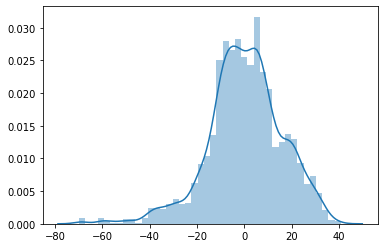

In [113]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [114]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117134415953569
MSE: 251.0347659265906
RMSE: 15.844076682678313


In [115]:
# Creating a pickle file for the classifier
filename = 'IPL-score-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))